# Data Science Challenge: Part 1 - Exploratory Data Analysis

## Resampling Login Data in 15-Minute Intervals

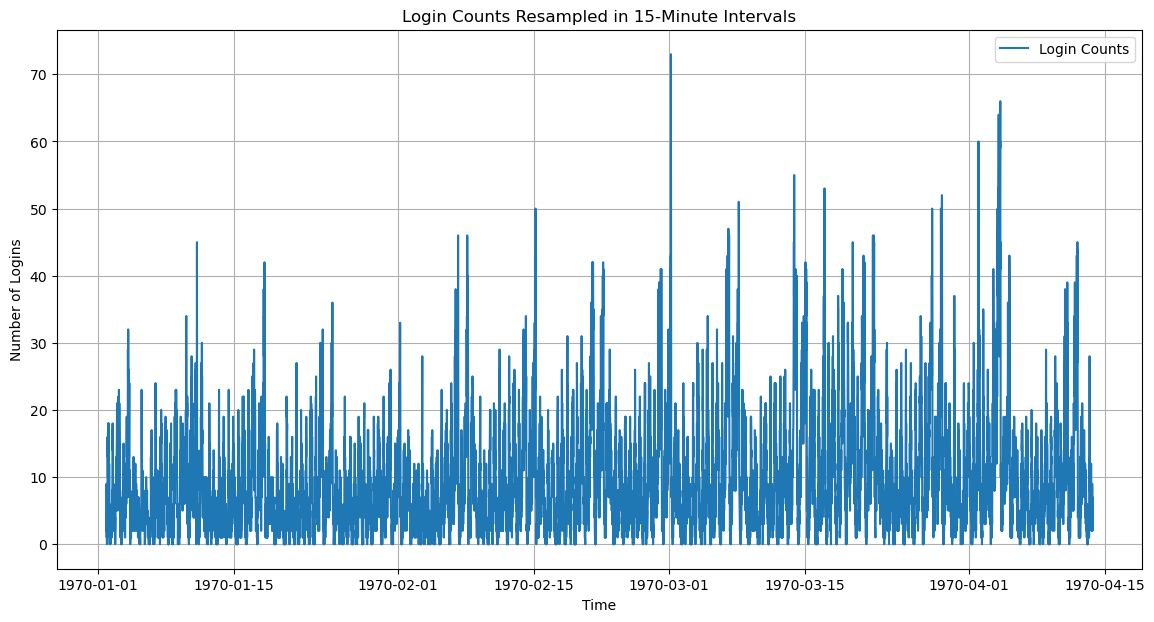

In [6]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the logins.json data
logins_data_path = 'logins.json'
login_data = pd.read_json(logins_data_path)

# Ensure the 'login_time' column is in datetime format
login_data['login_time'] = pd.to_datetime(login_data['login_time'])

# Set the 'login_time' column as the index
login_data.set_index('login_time', inplace=True)

# Check if the index is a DatetimeIndex
if not isinstance(login_data.index, pd.DatetimeIndex):
    raise TypeError("Index is not a DatetimeIndex!")

# Resample the data into 15-minute intervals
login_counts = login_data.resample('15T').size()

# Plotting the time series of login counts
plt.figure(figsize=(14, 7))
plt.plot(login_counts.index, login_counts, label='Login Counts')
plt.title('Login Counts Resampled in 15-Minute Intervals')
plt.xlabel('Time')
plt.ylabel('Number of Logins')
plt.grid(True)
plt.legend()
plt.show()


# Part 2: Experiment and Metrics Design

The Ultimate company has proposed an experiment to encourage driver partners to serve both Gotham and Metropolis
by reimbursing toll costs.

### Key Metric of Success

The key metric for success in this experiment would be the **number of unique drivers** who operate in both Gotham and Metropolis.
This metric reflects the extent to which the reimbursement program incentivizes drivers to serve both cities.

### Experiment Design

1. **Implementation**: 
   - Create two groups of drivers: 
     - **Control group**: No reimbursement for tolls.
     - **Treatment group**: Full reimbursement of tolls.
   - Track the number of unique drivers serving both cities over a set time period (e.g., 1 month).
   
2. **Statistical Tests**:
   - Use a **two-sample t-test** to compare the average number of drivers serving both cities between the two groups.
   - Alternatively, we could use an **ANOVA** if we have more than two groups (e.g., partial reimbursement vs. full reimbursement).

3. **Results Interpretation**:
   - If the t-test or ANOVA shows a statistically significant increase in the number of drivers serving both cities in the treatment group, we can conclude that the toll reimbursement is effective.
   - If no significant difference is observed, the reimbursement may not be enough incentive or other factors are at play.



# Part 3: Predictive Modeling

In this part of the challenge, we will use the `ultimate_data_challenge.json` dataset to predict rider retention.

### Steps:
1. Load and clean the data.
2. Define retention (whether a user was active in the last 30 days).
3. Build a predictive model (e.g., logistic regression) to classify users as retained or not.


In [9]:
# Part 3: Predictive Modeling
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Load the user data
user_data_path = 'ultimate_data_challenge.json'
user_data = pd.read_json(user_data_path)

# Convert date columns to datetime
user_data['signup_date'] = pd.to_datetime(user_data['signup_date'])
user_data['last_trip_date'] = pd.to_datetime(user_data['last_trip_date'])

# Define retention: User is retained if they were active in the last 30 days
user_data['retained'] = (user_data['last_trip_date'] >= (user_data['signup_date'] + pd.DateOffset(days=30))).astype(int)

# Check for missing values and fill/impute if necessary
'''user_data.fillna(user_data.mean(), inplace=True)

# Define features and target variable
X = user_data[['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'surge_pct', 'avg_surge', 'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct']]
y = user_data['retained']'''
# Check for missing values and fill/impute if necessary
# Apply fillna only to numeric columns
user_data.fillna(user_data.select_dtypes(include=['float64', 'int64']).mean(), inplace=True)

# Define features and target variable
X = user_data[['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'surge_pct', 'avg_surge', 'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct']]
y = user_data['retained']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))


Accuracy: 0.7404
              precision    recall  f1-score   support

           0       0.36      0.01      0.01      2583
           1       0.74      1.00      0.85      7417

    accuracy                           0.74     10000
   macro avg       0.55      0.50      0.43     10000
weighted avg       0.64      0.74      0.63     10000



C:\Users\sem_w\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



The predictive model chosen for this task is **logistic regression**, which is a suitable approach for binary classification problems, such as predicting whether a user will be active in their 6th month. I chose this model because it is simple, interpretable, and effective in binary scenarios like this.

#### Alternatives Considered:
- **Decision Trees**: I considered using decision trees, which provide a clear view of how the decision is made, but they can easily overfit.
- **Random Forests**: This ensemble method could potentially improve the performance by combining multiple decision trees, but it can be computationally expensive and harder to interpret.
- **Gradient Boosting**: Another advanced method, which could offer better predictive power, but again, it sacrifices interpretability for performance.

#### Concerns:
- **Class Imbalance**: The results indicate a significant class imbalance, with most users being retained (class `1`) and fewer not retained (class `0`). The model is heavily biased toward predicting the majority class (retained users), as seen in the precision for class `0` (non-retained users), which is only 0.36, with a recall of 0.01. This suggests that the model struggles to predict users who will not be retained.
- **Accuracy**: While the overall accuracy is 74%, it is mostly driven by the model's ability to correctly predict retained users. The performance for predicting non-retained users is quite poor, as reflected in the low precision and recall for class `0`.

#### Validity of the Model:
The model's high accuracy (74%) is misleading due to class imbalance. The key performance indicators—**precision, recall, and F1-score**—show that the model performs poorly in predicting non-retained users. To improve this, techniques such as **oversampling the minority class**, using **SMOTE** (Synthetic Minority Over-sampling Technique), or adjusting the class weights in logistic regression could be considered.

---

From the model's results, Ultimate can focus on improving retention efforts by targeting users who are at higher risk of churn (i.e., those not predicted to be retained). The following strategies can be derived from the insights:
- **Personalized Incentives**: Users flagged by the model as being less likely to be retained can be targeted with special incentives, such as discounts or loyalty rewards, to encourage continued use.
- **Improving Customer Experience**: Variables such as ratings from and to drivers could be important factors for retention. Ultimate can focus on improving the experience for users who have given or received lower ratings.
- **Engagement Campaigns**: Based on the model's predictions, Ultimate can design engagement campaigns to keep users active, especially during periods where they might be less likely to use the service.

While the model has room for improvement, it provides a starting point for identifying users at risk of churn and developing strategies to retain them.